In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_sas("bankloan.sas7bdat")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       850 non-null    float64
 1   ed        850 non-null    float64
 2   employ    850 non-null    float64
 3   address   850 non-null    float64
 4   income    850 non-null    float64
 5   debtinc   850 non-null    float64
 6   creddebt  850 non-null    float64
 7   othdebt   850 non-null    float64
 8   default   700 non-null    float64
dtypes: float64(9)
memory usage: 59.9 KB


In [4]:
df.isnull().sum()

age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default     150
dtype: int64

In [8]:
# no null data--->
df1 = df[~df["default"].isnull()]


In [9]:
# sample data with null values 
sample = df[df["default"].isnull()]

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 700 entries, 0 to 699
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       700 non-null    float64
 1   ed        700 non-null    float64
 2   employ    700 non-null    float64
 3   address   700 non-null    float64
 4   income    700 non-null    float64
 5   debtinc   700 non-null    float64
 6   creddebt  700 non-null    float64
 7   othdebt   700 non-null    float64
 8   default   700 non-null    float64
dtypes: float64(9)
memory usage: 54.7 KB


In [11]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 700 to 849
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       150 non-null    float64
 1   ed        150 non-null    float64
 2   employ    150 non-null    float64
 3   address   150 non-null    float64
 4   income    150 non-null    float64
 5   debtinc   150 non-null    float64
 6   creddebt  150 non-null    float64
 7   othdebt   150 non-null    float64
 8   default   0 non-null      float64
dtypes: float64(9)
memory usage: 11.7 KB


In [12]:
df1.duplicated().sum()

np.int64(0)

In [13]:
df.columns

Index(['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt', 'default'],
      dtype='object')

In [14]:
def IQR(x):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    lf = q1 - (1.5*iqr)
    uf = q3+(1.5*iqr)
    print("LF",lf)
    print("UF",uf)

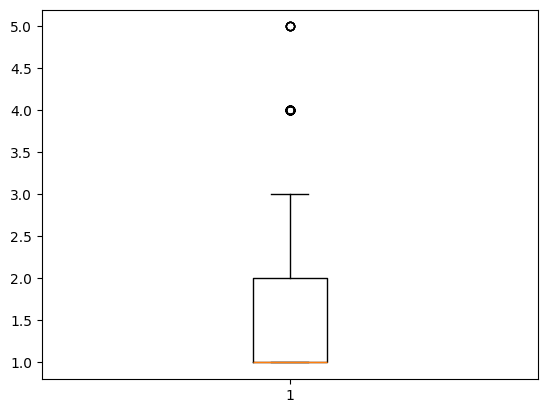

In [15]:
plt.boxplot(df1["ed"])
plt.show()

In [16]:
df1.columns

Index(['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt', 'default'],
      dtype='object')

In [17]:
IQR(df1["othdebt"])

LF -3.2741515000000003
UF 8.2413945


In [18]:
df1["employ"] = np.where(df1["employ"]>25.5,25.5,df1["employ"])
df1["address"] = np.where(df1["address"]>25.5,25.5,df1["address"])
df1["income"] = np.where(df1["income"]>101.5,101.5,df1["income"])
df1["debtinc"] = np.where(df1["debtinc"]>27.812,27.812,df1["debtinc"])
df1["creddebt"] = np.where(df1["creddebt"]>4.20,4.20,df1["creddebt"])
df1["othdebt"] = np.where(df1["othdebt"]>8.24,8.24,df1["othdebt"])

In [19]:
df1["ed"] = np.where(df1["ed"]>3.5,3.5,df1["ed"])

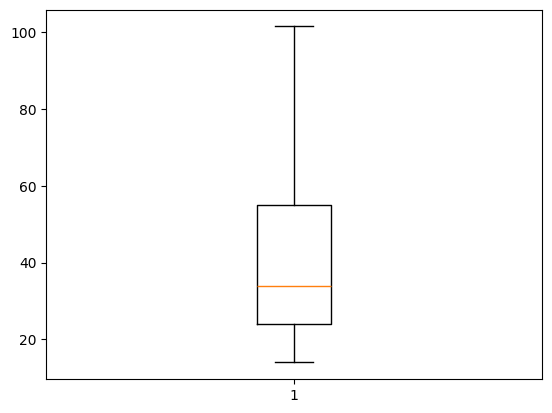

In [20]:
plt.boxplot(df1["income"])
plt.show()

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [22]:
df1.columns

Index(['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt', 'default'],
      dtype='object')

In [23]:
X = df1[['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt']]
y = df1["default"]

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,
                                                random_state=55)

In [25]:
lr = LogisticRegression()

In [26]:
lr.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [27]:
print("Train accuracy",lr.score(X_train,y_train))
print("Test Accuracy",lr.score(X_test,y_test))

Train accuracy 0.8
Test Accuracy 0.8285714285714286


In [28]:
sample.drop(columns = "default",inplace=True)

In [29]:
sample.columns

Index(['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt'],
      dtype='object')

In [30]:
d = pd.DataFrame({'age':[49],
              'ed':[2],
              'employ':[1],
              'address':[2],
              'income':[2], 
              'debtinc':[9],
              'creddebt':[1.5],
       'othdebt':[0.1]})

In [31]:
sample["pre_y"] = lr.predict(sample)
sample

,age,ed,employ,address,income,debtinc,creddebt,othdebt,pre_y
700,36.0,1.0,16.0,13.0,32.0,10.9,0.544128,2.943872,0.0
701,50.0,1.0,6.0,27.0,21.0,12.9,1.316574,1.392426,0.0
702,40.0,1.0,9.0,9.0,33.0,17.0,4.880700,0.729300,1.0
703,31.0,1.0,5.0,7.0,23.0,2.0,0.046000,0.414000,0.0
704,29.0,1.0,4.0,0.0,24.0,7.8,0.866736,1.005264,0.0
...,...,...,...,...,...,...,...,...,...
845,34.0,1.0,12.0,15.0,32.0,2.7,0.239328,0.624672,0.0
846,32.0,2.0,12.0,11.0,116.0,5.7,4.026708,2.585292,0.0
847,48.0,1.0,13.0,11.0,38.0,10.8,0.722304,3.381696,0.0
848,35.0,2.0,1.0,11.0,24.0,7.8,0.417456,1.454544,0.0


In [32]:
from sklearn.metrics import classification_report

In [33]:
print(classification_report(y_train,lr.predict(X_train)))

              precision    recall  f1-score   support

         0.0       0.83      0.92      0.87       412
         1.0       0.68      0.46      0.55       148

    accuracy                           0.80       560
   macro avg       0.75      0.69      0.71       560
weighted avg       0.79      0.80      0.79       560



In [34]:
print(classification_report(y_test,lr.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.85      0.93      0.89       105
         1.0       0.72      0.51      0.60        35

    accuracy                           0.83       140
   macro avg       0.79      0.72      0.75       140
weighted avg       0.82      0.83      0.82       140



In [35]:
pro_train = pd.DataFrame(lr.predict_proba(X_train),columns=["Pro_0","Pro_1"])

In [36]:
pro_train

,Pro_0,Pro_1
0,0.980187,0.019813
1,0.138460,0.861540
2,0.992253,0.007747
3,0.865825,0.134175
4,0.895012,0.104988
...,...,...
555,0.584060,0.415940
556,0.958455,0.041545
557,0.951249,0.048751
558,0.959377,0.040623


In [37]:
copy = pro_train.copy()

In [38]:
copy

,Pro_0,Pro_1
0,0.980187,0.019813
1,0.138460,0.861540
2,0.992253,0.007747
3,0.865825,0.134175
4,0.895012,0.104988
...,...,...
555,0.584060,0.415940
556,0.958455,0.041545
557,0.951249,0.048751
558,0.959377,0.040623


In [44]:
copy["pre_y"] = lr.predict(X_train)

In [45]:
copy["mannual_pre_y"] = np.where(pro_train["Pro_1"]>0.5,1,0)

In [46]:
copy.head()

,Pro_0,Pro_1,pre_y,mannual_pre_y
0,0.980187,0.019813,0.0,0
1,0.138460,0.861540,1.0,1
2,0.992253,0.007747,0.0,0
3,0.865825,0.134175,0.0,0
4,0.895012,0.104988,0.0,0


In [47]:
actual = y_train
pre = np.where(pro_train["Pro_1"]>0.5,1,0)

In [48]:
print(classification_report(actual,pre))

              precision    recall  f1-score   support

         0.0       0.83      0.92      0.87       412
         1.0       0.68      0.46      0.55       148

    accuracy                           0.80       560
   macro avg       0.75      0.69      0.71       560
weighted avg       0.79      0.80      0.79       560



In [49]:
print("old Value")
print(classification_report(actual, pre))

old Value
              precision    recall  f1-score   support

         0.0       0.83      0.92      0.87       412
         1.0       0.68      0.46      0.55       148

    accuracy                           0.80       560
   macro avg       0.75      0.69      0.71       560
weighted avg       0.79      0.80      0.79       560



In [52]:
sample.drop(columns = "pre_y",inplace=True)

In [53]:
sam_pro  = pd.DataFrame(lr.predict_proba(sample),columns=["Pro_0","Pro_1"])

In [54]:
sample["default"] = np.where(sam_pro["Pro_1"]>0.3,1,0)

In [55]:
sample

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
700,36.0,1.0,16.0,13.0,32.0,10.9,0.544128,2.943872,0
701,50.0,1.0,6.0,27.0,21.0,12.9,1.316574,1.392426,0
702,40.0,1.0,9.0,9.0,33.0,17.0,4.880700,0.729300,1
703,31.0,1.0,5.0,7.0,23.0,2.0,0.046000,0.414000,0
704,29.0,1.0,4.0,0.0,24.0,7.8,0.866736,1.005264,1
...,...,...,...,...,...,...,...,...,...
845,34.0,1.0,12.0,15.0,32.0,2.7,0.239328,0.624672,0
846,32.0,2.0,12.0,11.0,116.0,5.7,4.026708,2.585292,0
847,48.0,1.0,13.0,11.0,38.0,10.8,0.722304,3.381696,0
848,35.0,2.0,1.0,11.0,24.0,7.8,0.417456,1.454544,0


In [56]:
sample.columns

Index(['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt', 'default'],
      dtype='object')

In [61]:
dd = pd.read_excel("open.xlsx")

In [62]:
dd

,age,ed,employ,address,income,debtinc,creditebt,othdebt
0,20,2,10,5,15,20,2,4
